# Plot solution

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from classes.Case import Case
import numpy as np

In [2]:
from matplotlib import interactive

interactive(True)

In [3]:
font = {'family' : 'Times New Roman',
        'size'   : 11}

matplotlib.rc('font', **font)

# Plot single time step

In [4]:
# Save file content to object.
file = 'ball_0.0001_pu_8_wls_0.05_0.15.h5'
input_file = "../data/{}".format(file)
data = Case(input_file)

Loading data from ../data/ball_0.0001_pu_8_wls_0.05_0.15.h5 ...


In [5]:
time = 0
idx = data.times.index(time)
positions = data.positions[idx]
solution = data.solutions[idx]
print(len(solution))

21945


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


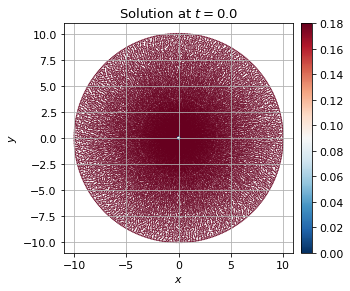

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# FVM
# ax.plot(data.times, data.velocities, label = "meshless")

## Meshless
p = ax.scatter(positions[0], positions[1], s= 0.3, c=solution, cmap='RdBu_r')

# PLot metadata
ax.set_title("Solution at $t={:.1f}$".format(time))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_aspect('equal')
ax.grid("both")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(p, cax=cax)
plt.tight_layout()

if 1:
    plt.savefig('../results/solution.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

## Plot multiple steps

In [7]:
# Save file content to object.
file = 'ball_0.0001_pu_8_wls_0.05_0.15.h5'
input_file = "../data/{}".format(file)
data = Case(input_file)

Loading data from ../data/ball_0.0001_pu_8_wls_0.05_0.15.h5 ...


In [8]:
times = [1.0, 5.0, 9.0]
idxs = [data.times.index(time) for time in times]

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


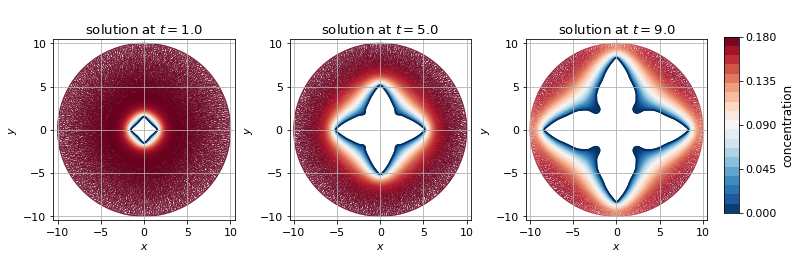

In [9]:
fig, (ax, ax2, ax3, cax) = plt.subplots(ncols=4,figsize=(10,3.5), gridspec_kw={"width_ratios":[1,1,1, 0.03]}, constrained_layout=True)
# fig.subplots_adjust(wspace=0.3)
axs=[ax, ax2, ax3]
for ax, time, idx in zip(axs, times, idxs):
    p = ax.scatter(data.positions[idx][0], data.positions[idx][1], s= 0.3, c=data.solutions[idx], cmap='RdBu_r', vmin=0, vmax=0.18)
    # PLot metadata
    ax.set_title("solution at $t={:.1f}$".format(time))
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_ylim(-10.5, 10.5)
    ax.set_xlim(-10.5, 10.5)
    ax.set_aspect('equal')
    ax.grid("both")

cax.axis('off')
cax = fig.add_axes([1, 0.17, 0.02, 0.7])
cbar=fig.colorbar(p, cax=cax, label='concentration', boundaries=np.linspace(0,0.18,20), ticks=np.linspace(0,0.18,5))
cbar.set_label(label='concentration', size=12)

if 1:   
    plt.savefig('../results/solution_multiple.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()